In [41]:
from datetime import datetime
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [59]:
# Problem 1
DJIA = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/DJIA.csv",index_col='DATE')
DJIA.index = pd.to_datetime(DJIA.index)
DJIA[DJIA=='.']  = np.nan
DJIA = pd.to_numeric(DJIA['VALUE'])
print(DJIA.head())


DATE
2006-09-27    11689.24
2006-09-28    11718.45
2006-09-29    11679.07
2006-10-02    11670.35
2006-10-03    11727.34
Name: VALUE, dtype: float64


In [43]:
# Problem 2
paychecks = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/paychecks.csv",header=None,names=['Paycheck'],squeeze=True)
date_1 = pd.date_range(start='3/13/2008', periods = 46, freq='WOM-1FRI')
date_2 = pd.date_range(start='3/13/2008', periods = 47, freq='WOM-3FRI')
paychecks.index = date_1.union(date_2)
print(paychecks.head())

2008-03-21    1122.26
2008-04-04     921.03
2008-04-18     962.46
2008-05-02    1035.97
2008-05-16    1078.59
Name: Paycheck, dtype: float64


In [44]:
# Problem 4
finances = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/finances.csv")
finances.index = pd.period_range('1978-09',periods=len(finances),freq='Q-AUG')
print(finances.head())

         EARNINGS   EXPENSES
1979Q1  372572.16  122611.27
1979Q2  419440.58  133176.18
1979Q3  419766.49  154670.69
1979Q4  361453.31  209360.42
1980Q1  354463.33  174147.13


In [45]:
# Problem 5
web_traffic = pd.read_csv("/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk2_VisPandas/website_traffic.csv")
web_traffic['ENTER'] = pd.to_datetime(web_traffic['ENTER'])
web_traffic['LEAVE'] = pd.to_datetime(web_traffic['LEAVE'])
web_traf_1 = (web_traffic['LEAVE']-web_traffic['ENTER']).mean()
print('Mean Website Duration:', web_traf_1)

web_traffic = web_traffic.set_index('ENTER')
web_traffic['Visit'] = 1
web_traf_2 = web_traffic['Visit'].resample('H').sum()

print(web_traf_2)


Mean Website Duration: 0 days 00:05:04.731647
ENTER
2016-10-07 01:00:00    618
2016-10-07 02:00:00    655
2016-10-07 03:00:00    670
2016-10-07 04:00:00    632
2016-10-07 05:00:00    672
2016-10-07 06:00:00    602
2016-10-07 07:00:00    660
2016-10-07 08:00:00    650
2016-10-07 09:00:00    665
2016-10-07 10:00:00    647
2016-10-07 11:00:00    605
2016-10-07 12:00:00    646
2016-10-07 13:00:00    670
2016-10-07 14:00:00    628
2016-10-07 15:00:00    607
2016-10-07 16:00:00    683
2016-10-07 17:00:00    632
2016-10-07 18:00:00    629
2016-10-07 19:00:00    702
2016-10-07 20:00:00    644
2016-10-07 21:00:00    641
2016-10-07 22:00:00    677
Freq: H, Name: Visit, dtype: int64


In [60]:
# Problem 6
daily = DJIA - DJIA.shift(1)
gain_day = daily.idxmax()
loss_day = daily.idxmin()

DJIA_month = DJIA.resample('M').sum()
month = DJIA_month - DJIA_month.shift(1)
gain_month = month.idxmax()
loss_month = month.idxmin()

print('Largest Gain by Day:', gain_day, ' by Month:', gain_month)
print('Largest Loss by Day:', loss_day, ' by Month:', loss_month)

Largest Gain by Day: 2008-10-13 00:00:00  by Month: 2006-10-31 00:00:00
Largest Loss by Day: 2008-09-29 00:00:00  by Month: 2016-09-30 00:00:00


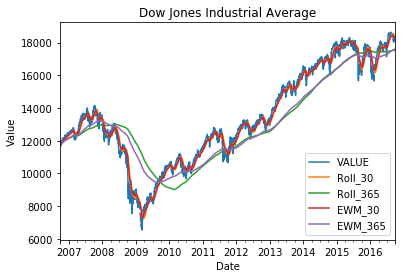

In [78]:
# Problem 7
df = DJIA.to_frame()
df['Roll_30']= df['VALUE'].rolling(window=30,min_periods=1).mean()
df['Roll_365'] = df['VALUE'].rolling(window=365,min_periods=1).mean()
df['EWM_30'] = df['VALUE'].ewm(span=30).mean()
df['EWM_365'] = df['VALUE'].ewm(span=365).mean()

df.plot()
plt.title("Dow Jones Industrial Average")
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()
plt.close()